In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
df=pd.read_csv("/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
pd.set_option("display.max_columns",23)

###1-Analysis Phase

In [3]:
Null_pct=df.apply(pd.isna).sum()/df.shape[0]

In [4]:
grp=df.groupby(["Churn"])
Yes=grp.get_group("Yes")
No=grp.get_group("No")


In [7]:
labels_No=No["Contract"].unique()
Slice_No=No["Contract"].value_counts()
labels_Yes=Yes["Contract"].unique()
Slice_Yes=Yes["Contract"].value_counts()

In [36]:
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


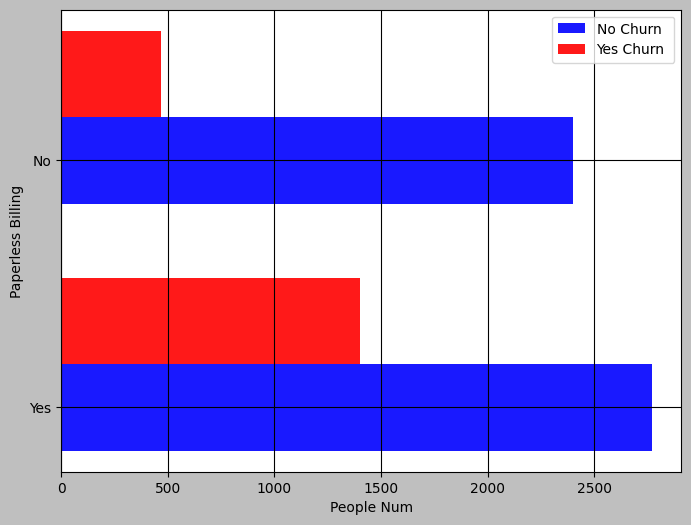

In [9]:
plt.style.use("grayscale")
plt.figure(figsize=(8, 6))
no_churn_internet_service_counts = No["PaperlessBilling"].value_counts()
yes_churn_internet_service_counts = Yes["PaperlessBilling"].value_counts()
internet_service_categories = No["PaperlessBilling"].unique()
bar_width = 0.35
plt.grid()
bar_positions = range(len(internet_service_categories))
plt.barh(bar_positions, no_churn_internet_service_counts, height=bar_width,
         color="b", label="No Churn ",alpha=0.9)
plt.barh([pos + bar_width for pos in bar_positions], yes_churn_internet_service_counts, height=bar_width,
         color="r", label="Yes Churn ",alpha=0.9)
plt.yticks(bar_positions, internet_service_categories)
plt.xlabel("People Num")
plt.ylabel("Paperless Billing")
plt.legend()
plt.show()


### The First Factor

The data indicates a significant difference in customer behavior based on their preference for paperless billing. Specifically, there is a difference of 931 customers who canceled their subscription between the group that opted for paperless billing and the group that did not. Additionally, there is a difference of 368 customers who are still actively using the services between the two groups.

Based on these findings, it can be suggested that reducing the adoption of paperless billing may contribute to acquiring more loyal customers who consistently pay their bills each month. Customers who prefer traditional billing methods might exhibit a higher likelihood of remaining loyal and continuing to use the service.

In conclusion, businesses should consider offering options for both paperless and traditional billing to cater to the preferences of different customer segments. By providing flexibility and accommodating customer preferences, companies can increase customer satisfaction, reduce churn, and foster loyalty. It is important to continuously monitor and analyze customer behaviors and preferences to refine billing options and optimize customer retention strategies.

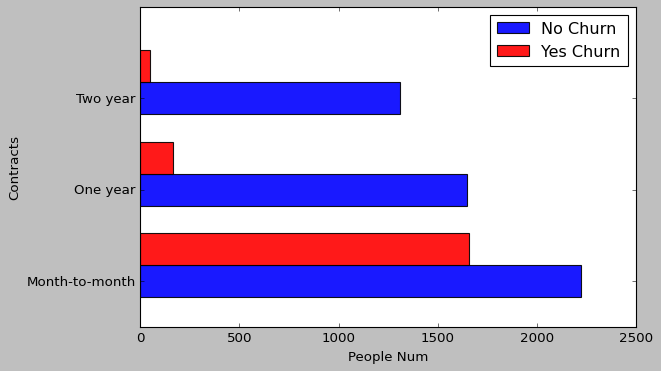

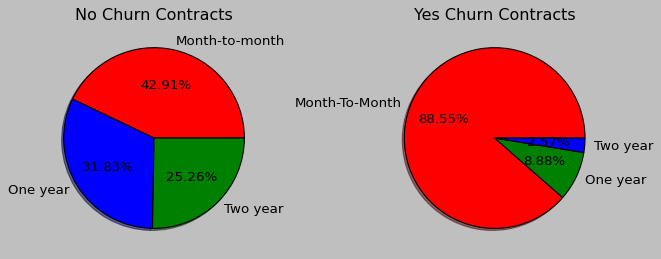

In [10]:
plt.style.use("classic")
fig1,ax1=plt.subplots(nrows=1,figsize=(8,5))
fig2,(ax2,ax3)=plt.subplots(nrows=1,ncols=2,figsize=(8.4,8))

no_churn_internet_service_counts = No["Contract"].value_counts()
yes_churn_internet_service_counts = Yes["Contract"].value_counts()
internet_service_categories = No["Contract"].unique()
bar_width = 0.35
bar_positions = range(len(internet_service_categories))
ax1.barh(bar_positions, no_churn_internet_service_counts, height=bar_width,
         color="b", label="No Churn ",alpha=0.9)
ax1.barh([pos + bar_width for pos in bar_positions], yes_churn_internet_service_counts, height=bar_width,
         color="r", label="Yes Churn",alpha=0.9)
ax1.set_yticks(bar_positions, internet_service_categories)
ax1.set_xlabel("People Num")
ax1.set_ylabel("Contracts")
ax1.legend()
ax2.pie(Slice_No,labels=labels_No,colors=["r","b","green"],autopct="%1.2f%%",wedgeprops={"edgecolor":"k","linewidth":1},shadow=True)
ax2.set_title("No Churn Contracts")
ax3.pie(Slice_Yes,labels=["Month-To-Month","One year","Two year"],colors=["r","green","b"],autopct="%1.2f%%",wedgeprops={"edgecolor":"k","linewidth":1},shadow=True)
ax3.set_title("Yes Churn Contracts")
plt.grid()

plt.tight_layout()
plt.show()

###The Second Factor
Among the customers who churned ( stopped their subscription), 88.55% had a month-to-month contract, while only 11.45% had either a one-year or two-year contract.

In contrast, among the customers who continue to use the service ( no churn), 42.91% have a month-to-month contract. However, a significant portion of customers with no churn have longer-term contracts, with 31.83% having a one-year contract and 25.26% having a two-year contract.


Based on the data provided, it is evident that customers with longer-term contracts are more likely to exhibit loyalty and continue using the service without churning. To capitalize on this insight and improve customer retention, the following suggestions can be considered:



1.   Incentivize Longer-Term Contracts: Offer special discounts, rewards, or additional benefits for customers who opt for one-year or two-year contracts. By providing incentives, you can encourage customers to commit to longer-term contracts, increasing their likelihood of remaining loyal.

2.   Communicate Benefits of Long-Term Contracts: Clearly communicate the advantages of longer-term contracts to customers. Highlight benefits such as cost savings, service stability, and access to exclusive features or content. Emphasize the value proposition to encourage customers to choose longer-term commitments.

2. Personalize Retention Efforts: Utilize customer data and analytics to identify customers who are at higher risk of churning due to their contract type. Implement targeted retention strategies for these customers, such as personalized offers or proactive customer support, to increase their satisfaction and likelihood of staying with the service.

3. Flexible Contract Options: While longer-term contracts are beneficial for customer retention, some customers may prefer flexibility. Consider offering flexible contract options, such as month-to-month contracts with reasonable terms, to cater to customers who value shorter commitments.

By implementing these suggestions, businesses can enhance customer retention by promoting longer-term contracts and creating a positive customer experience that encourages loyalty and reduces churn.







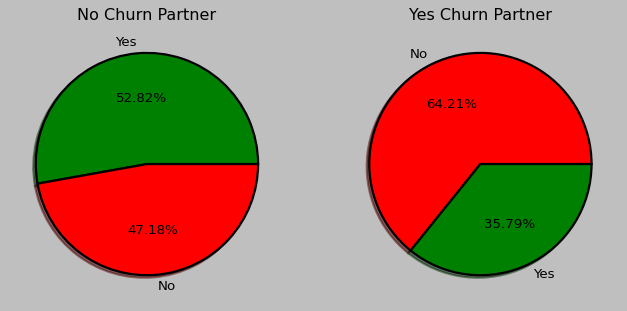

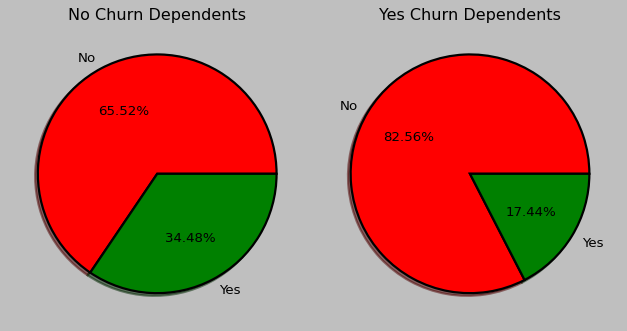

In [11]:
plt.style.use("classic")
Slice_par_Yes=Yes["Partner"].value_counts()
Slice_par_No=No["Partner"].value_counts()
Slice_De_Yes=Yes["Dependents"].value_counts()
Slice_De_No=No["Dependents"].value_counts()

fig,(ax2,ax3)=plt.subplots(nrows=1,ncols=2,figsize=(9.86,6))
fig,(ax0,ax1)=plt.subplots(nrows=1,ncols=2,figsize=(8,6))
ax2.pie(Slice_par_No,labels=["Yes","No"],colors=["green","r"],autopct="%1.2f%%",wedgeprops={"edgecolor":"k","linewidth":2},shadow=True)
ax2.set_title("No Churn Partner")
ax3.pie(Slice_par_Yes,labels=["No","Yes"],colors=["r","green"],autopct="%1.2f%%",wedgeprops={"edgecolor":"k","linewidth":2},shadow=True)
ax3.set_title("Yes Churn Partner")
ax0.pie(Slice_De_No,labels=["No","Yes"],colors=["r","green"],autopct="%1.2f%%",wedgeprops={"edgecolor":"k","linewidth":2},shadow=True)
ax0.set_title("No Churn Dependents")
ax1.pie(Slice_De_Yes,labels=["No","Yes"],colors=["r","green"],autopct="%1.2f%%",wedgeprops={"edgecolor":"k","linewidth":2},shadow=True)
ax1.set_title("Yes Churn Dependents")
plt.tight_layout()
plt.show()

### The Third Factor



*   The presence of a partner seems to have a different impact on churn behavior among customers.
*   Among the customers who churned, a lower percentage (35.79%) had a partner compared to those who did not churn (52.83%).

*   This suggests that having a partner may contribute to a higher likelihood of not churning, as indicated by the higher percentage in the "No Churn Partner" category.
*   The difference in partnership status between churned and non-churned customers may indicate that having a partner could be a factor influencing customer retention.




Additionally, considering the presence of dependents:

* Among the customers who did not churn, a significant percentage (65.52%) had dependents, while the remaining percentage (34.48%) did not have dependents.

* In contrast, among the customers who churned, a lower percentage (17.44%) had dependents, while the majority (82.56%) did not have dependents.

* The data suggests that not having dependents may be associated with a higher likelihood of customer retention.
* Customers without dependents have a higher percentage in the "No Churn" category, indicating a higher likelihood of not churning.

* On the other hand, a lower percentage of customers with dependents remained, suggesting that having dependents might be a factor contributing to a higher churn rate.


In conclusion, the analysis reveals that both the presence of a partner and the presence of dependents have notable impacts on churn behavior and customer retention. Customers with a partner are more likely to remain loyal and continue using the service without churning, while customers without dependents also exhibit a higher likelihood of not churning. These findings suggest that having a partner and having dependents play significant roles in influencing customer retention. Businesses should consider these demographic factors when designing customer retention strategies, as they can help identify target segments and tailor approaches to enhance customer loyalty and reduce churn.








###2-Prediction Phase
####Feature Engineering

In [12]:
df_pred=pd.DataFrame(df[df.columns[df.columns.isin(["customerID","Dependents","Partner","Contract","PaperlessBilling","Churn"])]])

In [13]:
df_pred.columns=df_pred.columns.str.lower()

In [14]:
df_pred["customerid_code"]=df_pred["customerid"].astype("category").cat.codes
df_pred["partner_code"]=df_pred["partner"].astype("category").cat.codes
df_pred["dependents_code"]=df_pred["dependents"].astype("category").cat.codes
df_pred["contract_code"]=df_pred["contract"].astype("category").cat.codes
df_pred["paperlessbilling_code"]=df_pred["paperlessbilling"].astype("category").cat.codes
df_pred["target"]=(df_pred["churn"]=="Yes").astype(int)

In [15]:
predictors=df_pred.columns[df_pred.columns.isin(["customerid_code","partner_code","dependents_code","contract_code","paperlessbilling_code"])]
X=df_pred[predictors]
y=df_pred["target"]
Model1=RandomForestClassifier(n_estimators=100,min_samples_split=10,random_state=42)
Model2=DecisionTreeClassifier()
Model3=SVC()
Model4=KNeighborsClassifier()
Model5=LogisticRegression()

In [16]:
train,val,test=np.split(df_pred,[int(0.6*df_pred.shape[0]),int(0.8*df_pred.shape[0])])
def scaler(dataframe,oversample=False):
  X=dataframe[predictors].values
  y=dataframe["target"].values
  scaler=StandardScaler()
  X=scaler.fit_transform(X)
  data=np.hstack((X,y.reshape(-1,1)))
  if oversample:
    ros=RandomOverSampler()
    X,y=ros.fit_resample(X,y)
  return data , X,y

In [17]:
train,X_train,y_train=scaler(df_pred,oversample=True)
test,X_test,y_test=scaler(df_pred)

###Data Modeling


In [18]:
Model1.fit(X_train,y_train)
preds=Model1.predict(X_test)
R=pd.DataFrame(dict(Actual=y_test,Predicted=preds))
accr=classification_report(R["Actual"],R["Predicted"])


####Model Evaluation

In [28]:
Prediction=R.merge(df_pred[["customerid","churn"]],right_index=True,left_index=True)
Prediction["Predicted_Churn"]=Prediction['Predicted'].replace({1:"Yes",0:"No"})
Prediction=pd.DataFrame(dict(Customer_id=Prediction["customerid"],Actual_Churn=Prediction["churn"],Predicted_Churn=Prediction["Predicted_Churn"],Actual=Prediction["Actual"],Predicted=Prediction["Predicted"]))

accr=classification_report(R["Actual"],R["Predicted"])

In [33]:
Prediction.tail(20)

,Customer_id,Actual_Churn,Predicted_Churn,Actual,Predicted
7023,1035-IPQPU,No,No,0,0
7024,7398-LXGYX,No,Yes,0,1
7025,2823-LKABH,No,No,0,0
7026,8775-CEBBJ,Yes,Yes,1,1
7027,0550-DCXLH,No,No,0,0
7028,9281-CEDRU,No,No,0,0
7029,2235-DWLJU,No,No,0,0
7030,0871-OPBXW,No,Yes,0,1
7031,3605-JISKB,No,No,0,0
7032,6894-LFHLY,Yes,Yes,1,1


In [34]:
Cross=pd.crosstab(index=R["Actual"],columns=R["Predicted"])
print(accr)
print(Cross)

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      5174
           1       0.74      0.94      0.83      1869

    accuracy                           0.90      7043
   macro avg       0.86      0.91      0.88      7043
weighted avg       0.91      0.90      0.90      7043

Predicted     0     1
Actual               
0          4567   607
1           110  1759


the use of predictions in customer churn analysis and retention strategies facilitates proactive customer retention efforts, personalized interventions, resource optimization, strategy evaluation, performance measurement, and continuous improvement. By leveraging predictions, businesses can enhance their ability to retain customers, reduce churn rates, and increase customer loyalty.

###Feature Importance Analysis

In [35]:
importances = Model1.feature_importances_
feature_importances = pd.DataFrame({'Features':predictors, 'Importances': importances})
feature_importances=feature_importances.sort_values(by="Importances",ascending=False)
feature_importances.index=range(feature_importances.shape[0])
feature_importances

,Features,Importances
0,customerid_code,0.649343
1,contract_code,0.278266
2,paperlessbilling_code,0.041072
3,dependents_code,0.020145
4,partner_code,0.011174


The provided analysis appears to show the feature importances for different variables in a model. Each variable is represented by a code, and the corresponding importance values indicate the relative importance of each feature in predicting the target variable.

Analyzing the provided feature importances:

* customerid_code: This variable has the highest importance value of 0.642742. It suggests that the customer ID code has the most significant impact on the model's predictions.

* contract_code: This variable has an importance value of 0.283691, indicating that the type of contract ( month-to-month, one-year, or two-year) is also influential in predicting the target variable.

* paperlessbilling_code: This variable has a lower importance value of 0.041163, suggesting that the preference for paperless billing has a relatively smaller impact on the target variable compared to other features.

* dependents_code: This variable has an importance value of 0.020799, indicating that the presence of dependents is also a factor contributing to the model's predictions, although it has a relatively lower importance compared to other features.


* partner_code: This variable has the lowest importance value of 0.011606, suggesting that the presence of a partner has the least significant impact on the target variable among the provided features.


Overall, based on the given feature importances, the customer ID code and the contract type appear to be the most influential factors in predicting the target variable. However, it's important to note that the interpretation of feature importances may vary depending on the specific modeling techniques and dataset used. Further analysis and context about the problem domain are needed to provide more comprehensive insights.

###Strategy Implementation and Monitoring

####Strategy Implementation:
1. Reducing the adoption of paperless billing:
  * Objective: Decrease the percentage of customers opting for paperless billing by 15% within six months.
  * Implementation Steps:
    * Update the billing system to offer both paperless and traditional billing options.
    * Communicate the availability of traditional billing to existing and new customers through various channels.
    * Provide incentives, such as discounts or rewards, for customers who choose traditional billing.
    * Monitor the percentage of customers opting for paperless billing on a monthly basis and track progress towards the objective.

2. Incentivizing longer-term contracts:
   * Objective: Increase the percentage of customers with one-year or two-year contracts by 10% within one year.
   * Implementation Steps:
     * Develop special offers, such as discounted subscription rates or bonus features, for customers who choose longer-term contracts.

     * Promote the benefits of longer-term contracts through targeted marketing campaigns and personalized communication.

     * Train customer service representatives to highlight the advantages of longer-term contracts during customer interactions.
     * Regularly analyze contract data to measure progress towards the objective and adjust incentives if necessary.

####Strategy Monitoring:
1. Paperless billing adoption rate:
   * Key Performance Indicator (KPI): Percentage of customers opting for paperless billing.
    
   * Monitor the adoption rate on a monthly basis and compare it to the baseline data.

   * Analyze any fluctuations in the adoption rate and investigate the impact on customer churn and retention.
   
   * Regularly report the adoption rate to relevant stakeholders and discuss strategies to achieve the objective.

2. Contract type distribution:
  
  * KPI: Percentage of customers with one-year or two-year contracts.

  * Monitor the distribution of contract types on a regular basis and compare it to the target percentages.

  * Identify any shifts in contract preferences and evaluate the impact on customer churn and retention.

  * Provide regular reports on the contract type distribution to management and assess the effectiveness of incentives.

3. Customer churn analysis:
  * KPI: Churn rate (percentage of customers who cancel their
  subscription).

  * Analyze churn rates for different customer segments, such as those with and without partners or dependents.

  * Identify patterns and trends related to churn behavior based on demographic factors.

  * Implement targeted retention strategies for high-churn segments and evaluate their effectiveness over time.

  * Regularly review churn rates and assess the impact of implemented strategies on customer retention.
4. Customer satisfaction and loyalty:

  * KPI: Customer satisfaction scores, customer retention rates.

  * Conduct regular customer satisfaction surveys to measure satisfaction levels and identify areas for improvement.

  * Track customer retention rates to assess the success of implemented strategies in fostering loyalty.

  * Analyze feedback from customers who churned and identify common reasons for cancellation.

  * Continuously refine strategies based on customer feedback and monitor changes in satisfaction and retention metrics.

By implementing these strategy implementation and monitoring practices, businesses can effectively track progress, evaluate the impact of implemented strategies, and make informed decisions to optimize customer retention and loyalty. Regular analysis and adjustments based on the monitored data help ensure that strategies remain aligned with the evolving needs and preferences of customers.


